In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

X_train = pd.read_csv('./datasets/Edge_IIoT/X_train.csv')
X_test = pd.read_csv('./datasets/Edge_IIoT/X_test.csv')
y_attack_cat_train = pd.read_csv('./datasets/Edge_IIoT/y_attack_cat_train.csv')
y_attack_cat_test = pd.read_csv('./datasets/Edge_IIoT/y_attack_cat_test.csv')
y_label_train = pd.read_csv('./datasets/Edge_IIoT/y_label_train.csv')
y_label_test = pd.read_csv('./datasets/Edge_IIoT/y_label_test.csv')


print("X_train info:")
print(X_train.info())
print("\nX_test info:")
print(X_test.info())

X_train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873076 entries, 0 to 873075
Data columns (total 95 columns):
 #   Column                                                                                                Non-Null Count   Dtype  
---  ------                                                                                                --------------   -----  
 0   arp.opcode                                                                                            873076 non-null  float64
 1   arp.hw.size                                                                                           873076 non-null  float64
 2   icmp.checksum                                                                                         873076 non-null  float64
 3   icmp.seq_le                                                                                           873076 non-null  float64
 4   icmp.unused                                                                   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


classifiers = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
import joblib
import os
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report  
import seaborn as sns



results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'F1 Score': [],
    'Model Size (bytes)': []
}

predictions = {}
for name, clf in classifiers.items():
    
    clf.fit(X_train, y_label_train.values.ravel())
    y_pred = clf.predict(X_test)
    predictions[name] = clf.predict_proba(X_train)
    
    accuracy = accuracy_score(y_label_test, y_pred)
    precision = precision_score(y_label_test, y_pred, average='weighted')
    f1 = f1_score(y_label_test, y_pred, average='weighted')
    
    # Save the model to a file inside the 'joblib' folder
    model_filename = os.path.join('joblib', f"{name.replace(' ', '_')}_model.joblib")
    joblib.dump(clf, model_filename)
    model_size = os.path.getsize(model_filename)
    
    # Store the metrics in the results dictionary
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['F1 Score'].append(f1)
    results['Model Size (bytes)'].append(model_size)
    
    # Print the results
    # print(f"{name}:")
    # print(f"  Accuracy: {accuracy:.4f}")
    # print(f"  Precision: {precision:.4f}")
    # print(f"  F1 Score: {f1:.4f}")
    # print(f"  Model Size: {model_size} bytes\n")

results_df = pd.DataFrame(results)

print(results_df)

/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


            Classifier  Accuracy  Precision  F1 Score  Model Size (bytes)
0        MultinomialNB  0.680703   0.714324  0.667666                7095
1           GaussianNB  0.626646   0.730383  0.579279                7095
2          BernoulliNB  1.000000   1.000000  1.000000                7111
3        Decision Tree  1.000000   1.000000  1.000000                4825
4             AdaBoost  1.000000   1.000000  1.000000                6132
5        Random Forest  1.000000   1.000000  1.000000              104409
6  K-Nearest Neighbors  0.843510   0.843588  0.843501           670526454
7  Logistic Regression  0.778499   0.839371  0.768099                4895
8       MLP Classifier  0.742617   0.829998  0.724368              242392
9    Gradient Boosting  1.000000   1.000000  1.000000               99437


In [ ]:
# meta_X_train = []
# meta_y_train = []

# for i in range(X_train.shape[0]):
#     best_classifier = None
#     best_score = -1
#     for name, clf in classifiers.items():
#         y_pred = clf.predict(X_train.iloc[i:i+1])
#         score = accuracy_score(y_label_train.iloc[i:i+1], y_pred)
#         if score > best_score:
#             best_score = score
#             best_classifier = name
#     meta_X_train.append([pred[i][1] for pred in predictions.values()])
#     meta_y_train.append(best_classifier)

# meta_X_train = np.array(meta_X_train)
# meta_y_train = np.array(meta_y_train)

# meta_clf = LogisticRegression(max_iter=1000)
# meta_clf.fit(meta_X_train, meta_y_train)

# test_predictions = {}
# for name, clf in classifiers.items():
#     test_predictions[name] = clf.predict_proba(X_test)

# meta_X_test = []
# for i in range(X_test.shape[0]):
#     meta_X_test.append([pred[i][1] for pred in test_predictions.values()])

# meta_X_test = np.array(meta_X_test)
# meta_y_pred = meta_clf.predict(meta_X_test)

# final_predictions = []
# for i in range(X_test.shape[0]):
#     selected_clf = classifiers[meta_y_pred[i]]
#     final_predictions.append(selected_clf.predict(X_test.iloc[i:i+1])[0])

# accuracy = accuracy_score(y_label_test, final_predictions)
# report = classification_report(y_label_test, final_predictions)

# print(f"Accuracy: {accuracy * 100:.2f}%")
# print("Classification Report:")
# print(report)

KeyboardInterrupt: 

In [ ]:
le_attack_cat = LabelEncoder()
y_attack_cat_test_encoded = le_attack_cat.fit_transform(y_attack_cat_test.values.ravel())

category_results = []
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    for category in np.unique(y_attack_cat_test_encoded):
        indices = np.where(y_attack_cat_test_encoded == category)
        report = classification_report(y_label_test.values[indices], y_pred[indices], output_dict=True)
        category_results.append({
            'Classifier': name,
            'Category': le_attack_cat.inverse_transform([category])[0],
            'Precision': report['weighted avg']['precision'],
            # 'Recall': report['weighted avg']['recall'],
            'F1 Score': report['weighted avg']['f1-score']
        })
    

category_results_df = pd.DataFrame(category_results)

print(category_results_df)

/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rsunketa/.venv/lib64/python3.11

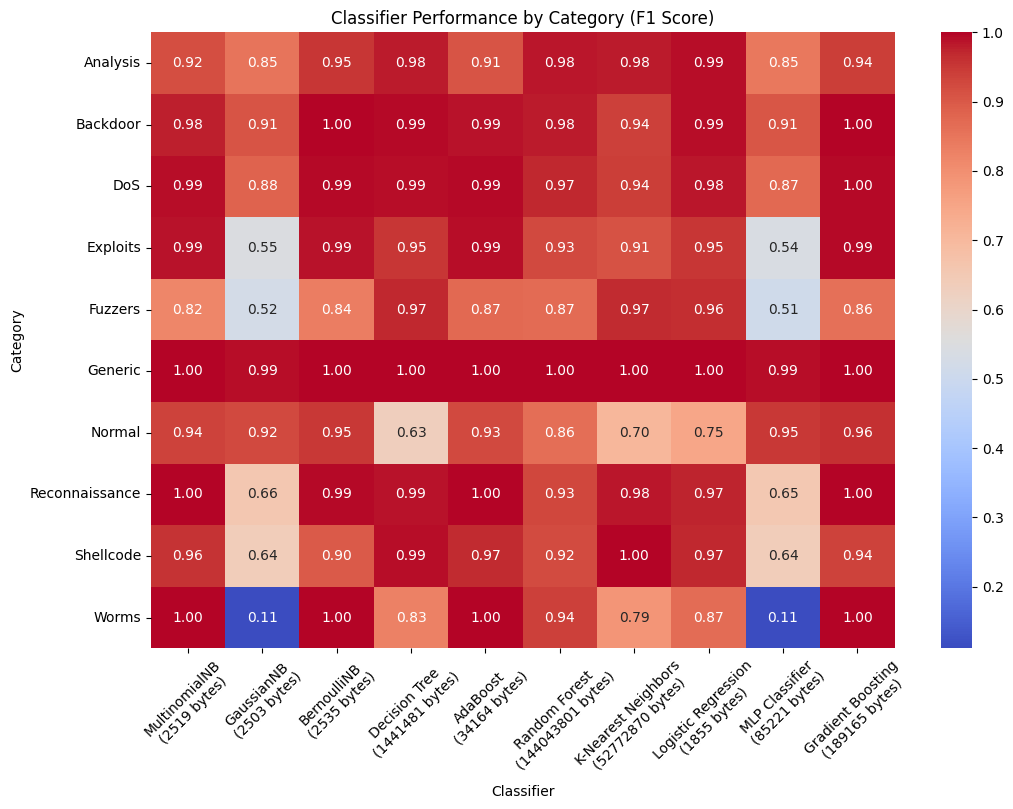

In [ ]:
pivot_df = category_results_df.pivot(index="Category", columns="Classifier", values="F1 Score")

classifier_names_with_size = [f"{name}\n({size} bytes)" for name, size in zip(results_df['Classifier'], results_df['Model Size (bytes)'])]
pivot_df.columns = classifier_names_with_size

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classifier Performance by Category (F1 Score)')
plt.xlabel('Classifier')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()